# **AlphaCare Insurance Analysis**

# **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis (EDA) is a vital step in any data engineering and analytics project. It helps to understand the dataset before conducting further analysis. EDA involves summarizing key characteristics and visualizing patterns, outliers, and trends within the data.

**Understand the Data Structure**
    
   1. **Data Loading**: Begin by loading the dataset and examining its structure.
   2. **Check Dimensions**: Determine the number of rows and columns in the dataset.
   3. **Preview Records**: Look at the first few records to get a sample of the data.

In [3]:
# Import necessary libraries
import os
import pandas as pd
import sys

# Adding the '../scripts' directory to the system path to import custom modules
sys.path.append(os.path.abspath('../scripts'))

# Importing necessary modules for data processing and loading data from zip files
from data_processing import DataProcessing
from extract_zip import load_data

In [4]:
# Define paths
current_dir = os.getcwd()
zip_file_path = os.path.join(current_dir, '../data/MachineLearningRating_v3.zip')
extract_to = os.path.join(current_dir, '../data/')
txt_filename = "MachineLearningRating_v3.txt"

In [5]:
# Load data
print("Loading and processing data...")
try:
    df = load_data(zip_file_path, txt_filename)
    print("Data loaded successfully.")
except RuntimeError as e:
    print(f"Error loading data: {str(e)}")

Loading and processing data...
Data loaded successfully.


In [6]:
# Display first few rows of the data
print("\nPreview of the loaded data:")
display(df.head())


Preview of the loaded data:


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


In [7]:
# Find the number of rows and columns
df.shape

(1000098, 52)

The loaded dataset has **100,0098 rows** and **52 columns**

# Data Quality Assessment

In [8]:
# Initialize DataProcessing instance
data_processor = DataProcessing(df)
print("✅ DataProcessing instance initialized successfully with the provided DataFrame.")

✅ DataProcessing instance initialized successfully with the provided DataFrame.


In [9]:
# Missing data summary
print("\nMissing Data Summary:")
missing_summary = data_processor.missing_data_summary()
display(missing_summary)


Missing Data Summary:


,Missing Count,Percentage (%)
NumberOfVehiclesInFleet,1000098,100.000000
CrossBorder,999400,99.930207
CustomValueEstimate,779642,77.956560
WrittenOff,641901,64.183810
Converted,641901,64.183810
Rebuilt,641901,64.183810
NewVehicle,153295,15.327998
Bank,145961,14.594670
AccountType,40232,4.022806
Gender,9536,0.953507


**Drop Columns with High Missing Data**

Columns with a significant amount of missing values typically do not provide valuable insights for analysis. Therefore, it's essential to remove them to enhance the quality of the dataset.

**Dropped Columns**

   1. **NumberOfVehiclesInFleet**:
       + **Missing Data**: 100%
       + **Reason for Removal**: This column is entirely empty, offering no useful information.
   2. **CrossBorder**:
       + **Missing Data**: ~99.93%
       + **Reason for Removal**: With nearly all entries missing, this column does not contribute to meaningful analysis.
  
   3. **CustomValueEstimate**:
       + **Missing Data**: ~77.96%
       + **Reason for Removal**: A high percentage of missing values limits the reliability of this data.
  
   4. **Converted, Rebuilt, WrittenOff**:
       + **Missing Data**: ~64.18%
       + **Reason for Removal**: More than half of the data points are missing, making it difficult to draw accurate conclusions.

By dropping these columns, we can improve the dataset's overall integrity and focus on more reliable data for analysis.

In [10]:
cols_to_drop = ['NumberOfVehiclesInFleet', 
                'CrossBorder', 
                'CustomValueEstimate', 
                'Converted', 'Rebuilt', 
                'WrittenOff']

# Drop these columns
data = data_processor.handle_missing_data('high', cols_to_drop)

print(f"Dropped columns with high missing data: {', '.join(cols_to_drop)}")

Dropped columns with high missing data: NumberOfVehiclesInFleet, CrossBorder, CustomValueEstimate, Converted, Rebuilt, WrittenOff


**Impute Moderate Missing Data**

Imputation is an effective technique for handling moderate amounts of missing data. It allows us to retain valuable information in the dataset while filling in gaps. In this process, we use:
   
   + **Mode**: The most frequently occurring value, applied to categorical columns.
   + **Median**: The middle value when the data is sorted, applied to numerical columns.

**Imputed Columns**:

   1. **NewVehicle**:
       + **Missing Data**: ~15.33%
       + **Imputation Method**: Mode was used to fill in missing values for this categorical column, ensuring that the most common vehicle status is represented.

   2. **Bank**:
       + **Missing Data**: ~14.59%
       + **Imputation Method**: Mode was employed for this categorical column, allowing us to retain the most frequently recorded bank information.

   3. **AccountType**:
       + **Missing Data**: ~4.02%
       + **Imputation Method**: Mode was utilized here as well, ensuring that the most common account type is accurately reflected in the dataset.

By employing imputation for these columns, we enhance the dataset's completeness and maintain its analytical value without significantly distorting the original data distribution.

In [11]:
# Impute or drop columns with moderate missing data
missing_cols = ['NewVehicle', 'Bank', 'AccountType']
data = data_processor.handle_missing_data('moderate', missing_cols)

print(f"Imputed columns with moderate missing data: {', '.join(missing_cols)}")

Imputed columns with moderate missing data: NewVehicle, Bank, AccountType


**Handle Low Missing Data - Standard Imputation**

For columns with low levels of missing data, standard imputation can be effectively applied without significantly impacting the overall quality of the dataset. This approach allows us to fill in missing values while maintaining the integrity of the data.

**Imputed Columns**:

   1. **Gender**:
       + **Missing Data**: ~0.95%
       + **Imputation Method**:The mode was used to fill in missing values, ensuring that the most common gender is accurately represented.

   2. **MaritalStatus**:
       + **Missing Data**: ~0.83%
       + **Imputation Method**: The mode was applied to this column as well, preserving the predominant marital status in the dataset.

   3. **Vehicle-Related Columns**:
       + **Missing Data**: ~0.055% each
       + **Examples**: Cylinders, CubicCapacity, Kilowatts, etc.
       + **Imputation Method**: The median was used for these numerical columns, allowing us to fill in missing values while minimizing distortion in the data distribution.

By imputed these columns, we enhance the dataset's completeness while ensuring that the imputation process does not compromise the data's overall quality.

In [12]:
# Handle low missing data (standard imputation)
missing_cols = ['Gender', 'MaritalStatus', 'Cylinders', 'cubiccapacity', 
                'kilowatts', 'NumberOfDoors', 'VehicleIntroDate', 'Model', 
                'make', 'VehicleType', 'mmcode', 'bodytype', 'CapitalOutstanding']

data = data_processor.handle_missing_data('low', missing_cols)

print(f"Imputed columns with low missing data: {', '.join(missing_cols)}")


Imputed columns with low missing data: Gender, MaritalStatus, Cylinders, cubiccapacity, kilowatts, NumberOfDoors, VehicleIntroDate, Model, make, VehicleType, mmcode, bodytype, CapitalOutstanding


**Overall Decision Summary**

To effectively manage missing data, I adopted a strategic, tiered approach based on the severity of the issue.

+ **High Missing Data**: I decided to drop columns with a significant amount of missing information, as they contributed little to the dataset's overall value.
+ **Moderate Missing Data**: For these columns, I employed imputation techniques. I used the mode for categorical variables, capturing the most common values, and the median for numerical variables to preserve data integrity.
+ **Low Missing Data**: Here, I also chose imputation to retain valuable insights, ensuring that no unnecessary data loss occurred.

This thoughtful strategy allowed me to maintain a robust and informative dataset while addressing missing data effectively.

In [13]:
# Check duplicates
data.duplicated().sum()

np.int64(74)

# Handle the Duplicates

In [14]:
# Display the duplicated rows
duplicates = data[data.duplicated()]
print(duplicates)

        UnderwrittenCoverID  PolicyID     TransactionMonth  IsVATRegistered  \
140792                92857      5279  2015-03-01 00:00:00            False   
140819                68955      5279  2015-08-01 00:00:00            False   
142437                68954      5279  2015-03-01 00:00:00            False   
147024                92857      5279  2015-08-01 00:00:00            False   
724410               133274     11364  2015-05-01 00:00:00            False   
...                     ...       ...                  ...              ...   
899911               133278     11364  2015-05-01 00:00:00            False   
899913               133278     11364  2015-07-01 00:00:00            False   
899918               133276     11364  2015-02-01 00:00:00            False   
899921               133272     11364  2015-04-01 00:00:00            False   
899924               133272     11364  2015-06-01 00:00:00            False   

       Citizenship   LegalType Title Language      

In [15]:
# Remove duplicates, keeping the first occurrence
data_cleaned = data.drop_duplicates()

# To reset the index after dropping duplicates
data_cleaned.reset_index(drop=True, inplace=True)

# Verify the number of duplicates remaining
print("Remaining duplicates:", data_cleaned.duplicated().sum())

Remaining duplicates: 0


In [16]:
print(data.columns.tolist())

['UnderwrittenCoverID', 'PolicyID', 'TransactionMonth', 'IsVATRegistered', 'Citizenship', 'LegalType', 'Title', 'Language', 'Bank', 'AccountType', 'MaritalStatus', 'Gender', 'Country', 'Province', 'PostalCode', 'MainCrestaZone', 'SubCrestaZone', 'ItemType', 'mmcode', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'Cylinders', 'cubiccapacity', 'kilowatts', 'bodytype', 'NumberOfDoors', 'VehicleIntroDate', 'AlarmImmobiliser', 'TrackingDevice', 'CapitalOutstanding', 'NewVehicle', 'SumInsured', 'TermFrequency', 'CalculatedPremiumPerTerm', 'ExcessSelected', 'CoverCategory', 'CoverType', 'CoverGroup', 'Section', 'Product', 'StatutoryClass', 'StatutoryRiskType', 'TotalPremium', 'TotalClaims']


In [17]:
# Get numerical features to Descriptive Statistics
numerical_features = data.select_dtypes(include=['number'])

# Print the numerical features
print(numerical_features.columns.tolist())


['UnderwrittenCoverID', 'PolicyID', 'PostalCode', 'mmcode', 'RegistrationYear', 'Cylinders', 'cubiccapacity', 'kilowatts', 'NumberOfDoors', 'SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']


In [18]:
# Statistic summary of numerical features
num_cols = ['UnderwrittenCoverID','PolicyID','RegistrationYear','NumberOfDoors','SumInsured', 'CalculatedPremiumPerTerm', 'TotalPremium', 'TotalClaims']
display(data[num_cols].describe())

,UnderwrittenCoverID,PolicyID,RegistrationYear,NumberOfDoors,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,2.010225e+03,4.019239e+00,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,3.261391e+00,4.681854e-01,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.987000e+03,0.000000e+00,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,2.008000e+03,4.000000e+00,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.011000e+03,4.000000e+00,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,2.013000e+03,4.000000e+00,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,2.015000e+03,6.000000e+00,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


# Dataset Overview and Insights

## General Overview

- **Total Records**: The dataset contains approximately **1,000,098** entries.

## Key Features

### Underwritten Cover ID
- **Mean**: Approximately **104,817**.
- **Range**: From **1** to **301,175**.

### Policy ID
- **Mean**: Approximately **7,957**.
- **Range**: From **14,000** to **23,246**.

### Registration Year
- **Mean Year**: Approximately **2003**.
- **Range**: From **1987** to **2015**.

### Number of Doors
- **Mean**: Approximately **4** doors.
- **Range**: From **0** (possibly indicating a motorcycle or similar) to **6** doors.

### Sum Insured
- **Mean**: Approximately **604,173** (currency not specified).
- **Range**: From **0.01** to **12,636,200**.
- **Standard Deviation**: High variability suggesting significant differences in insurance coverage among policies.

### Calculated Premium Per Term
- **Mean**: Approximately **117.88**.
- **Range**: From **0** to **74,422**.
- **Standard Deviation**: Indicates a wide range of calculated premiums.

### Total Premium
- **Mean**: Approximately **61.91**.
- **Range**: From **-782.58** (negative values may indicate refunds or corrections) to **65,282.60**.
- **Standard Deviation**: Shows considerable variability, with some policies having much higher premiums.

### Total Claims
- **Mean**: Approximately **64.86**.
- **Range**: From **-12,002.41** (negative values possibly indicating recoveries or adjustments) to **393,092.10**.
- **Standard Deviation**: High variability, indicating that some policies have significantly more claims than others.

## Insights

- **Data Quality**: There are negative values in the **Total Premium** and **Total Claims**, which may require further investigation to understand their meaning and handling.
  
- **Sum Insured**: The large mean and maximum values suggest a wide range of policies, potentially covering various asset values.

- **Premiums**: The disparity in **Calculated Premium Per Term** and **Total Premium** indicates differing pricing strategies or risk assessments for various policies.

- **Year of Registration**: The concentration around the early 2000s may indicate a trend in policy issuance during that time.

## Conclusion

This dataset appears to represent a diverse range of insurance policies, with significant variability in coverage values, premiums, and claims. Further analysis could focus on understanding the reasons behind the negative values and exploring the correlation between features, especially between premiums, claims, and the sum insured.

# Data Structure Overview

In [19]:
# Check the Data types of each column
data_types = data.dtypes

data_types.reset_index(name='data type')

,index,data type
0,UnderwrittenCoverID,int64
1,PolicyID,int64
2,TransactionMonth,object
3,IsVATRegistered,bool
4,Citizenship,object
5,LegalType,object
6,Title,object
7,Language,object
8,Bank,object
9,AccountType,object


In [20]:
print(data['VehicleIntroDate'].unique())

['6/2002' '3/2004' '2/2003' '6/2005' '2008/11/01 12:00:00 AM' '11/2010'
 '2008/08/01 12:00:00 AM' '5/2004' '2/2006' '8/2005'
 '2013/04/01 12:00:00 AM' '4/2007' '1/2012' '11/2006' '11/2007' '10/2010'
 '4/2012' '8/2006' '11/1992' '3/2005' '5/2010' '2014-02-01 12:00:00 AM'
 '7/2011' '3/2007' '11/1996' '12/2009' '4/2008' '10/1/2013 12:00:00 AM'
 '10/1996' '2006/07/01 12:00:00 AM' '3/2008' '7/2004' '8/2011' '8/2007'
 '8/2001' '10/2005' '8/2009' '8/2010' '11/2011' '10/2011' '1/2009'
 '10/1991' '10/2006' '3/2009' '2007/06/01 12:00:00 AM'
 '2007/03/01 12:00:00 AM' '10/2000' '7/2003' '8/2003' '5/2005' '10/1995'
 '6/1999' '9/1993' '3/2006' '9/1994' '2/2010' '4/2005' '11/1991' '10/1992'
 '9/2010' '6/2001' '2/2004' '12/1/2013 12:00:00 AM' '7/2010'
 '8/1/2013 12:00:00 AM' '10/2007' '1/2010' '9/1/2013 12:00:00 AM'
 '2012/03/01 12:00:00 AM' '4/1993' '2001/10/01 12:00:00 AM' '1/2003'
 '6/2007' '1992/03/01 12:00:00 AM' '9/2002' '9/2007' '7/1995' '1/2002'
 '2/1998' '1/1998' '12/2011' '2014-09-01 12:00:0

In [21]:
print(data['VehicleIntroDate'].dtype)

object


In [22]:
# Convert the VehicleIntroDate column from object to datetime format.
data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], format='%d/%m/%Y', errors='coerce')

print("Object converted to datetime successfully.")


Object converted to datetime successfully.


In [23]:
# Check the datatype of VehicleIntroDate
print(data['VehicleIntroDate'].dtype)

datetime64[ns]


# Univariate Analysis 

In [24]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import sys

# Add the 'scripts' directory to the Python path for module imports
sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [25]:
from data_visualization import DataVisualizer

In [26]:
# Initialize DataVisualizer instance
visualizer = DataVisualizer(df)
print("✅ DataVisualizer instance initialized successfully.")

✅ DataVisualizer instance initialized successfully.


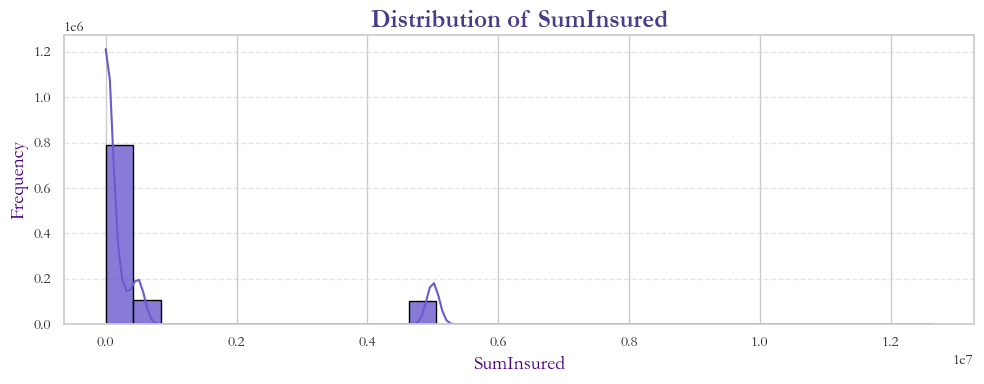

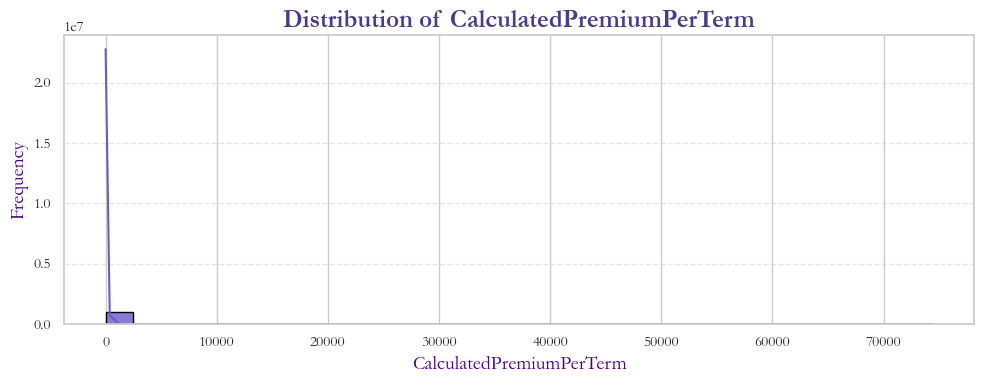

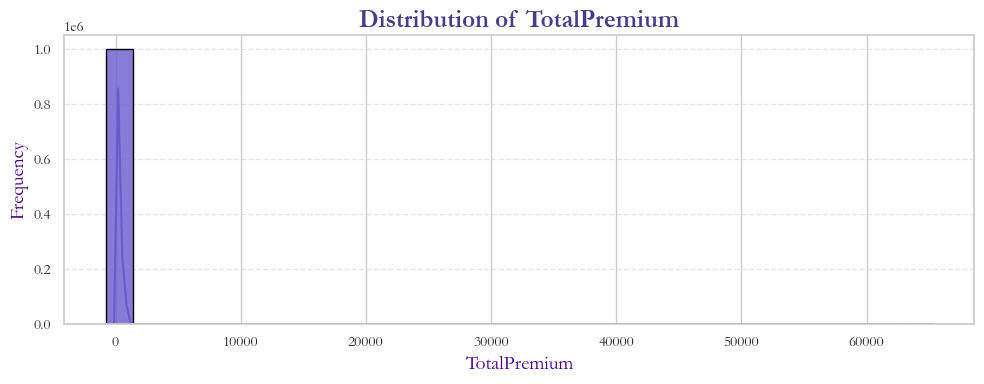

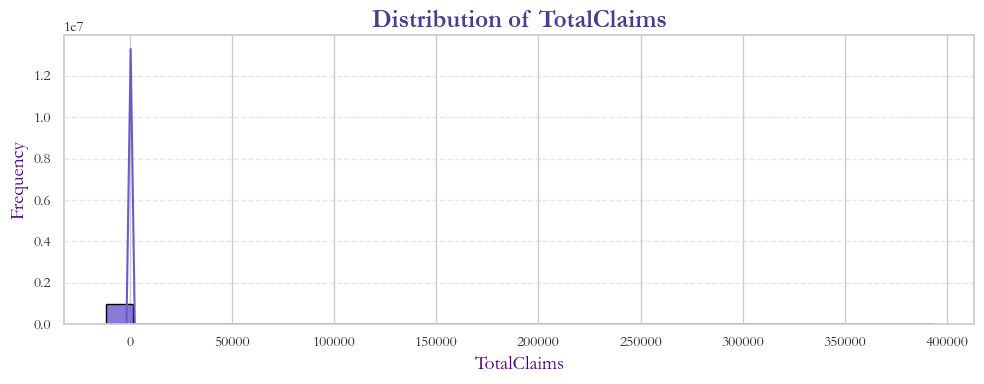

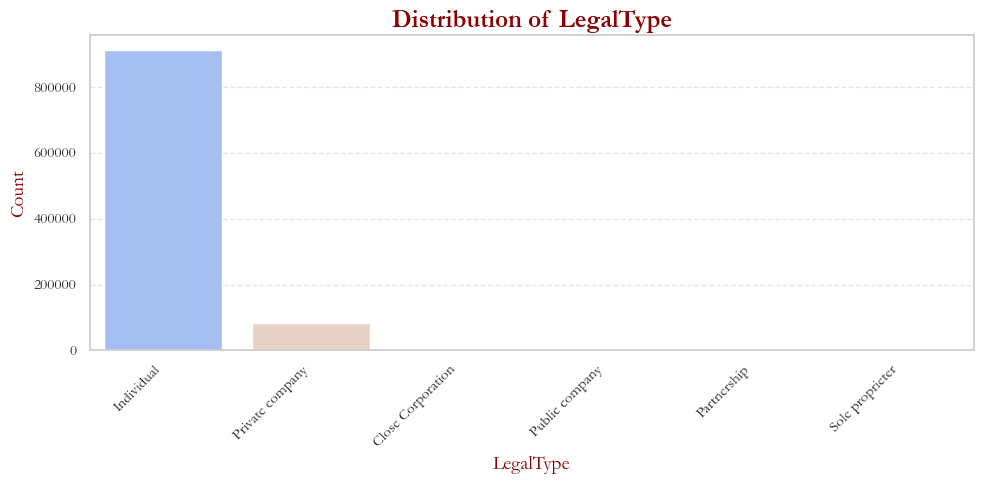

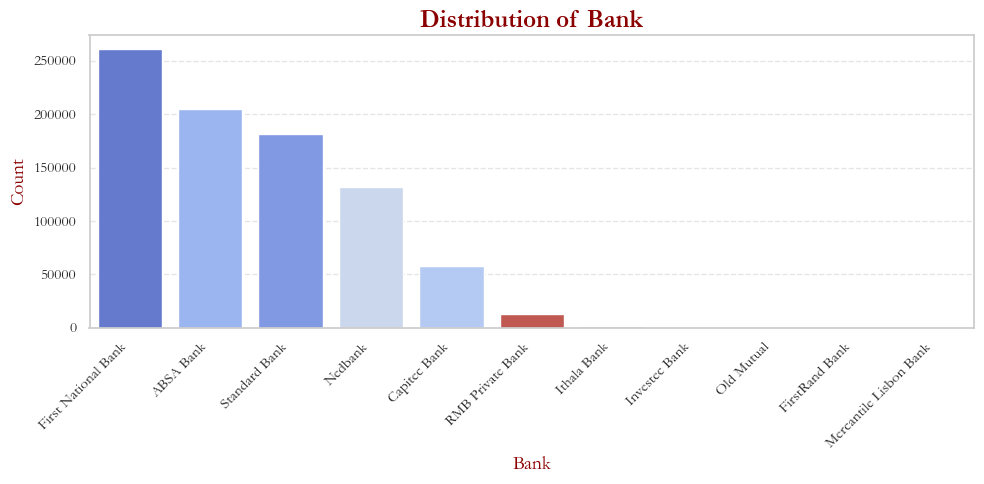

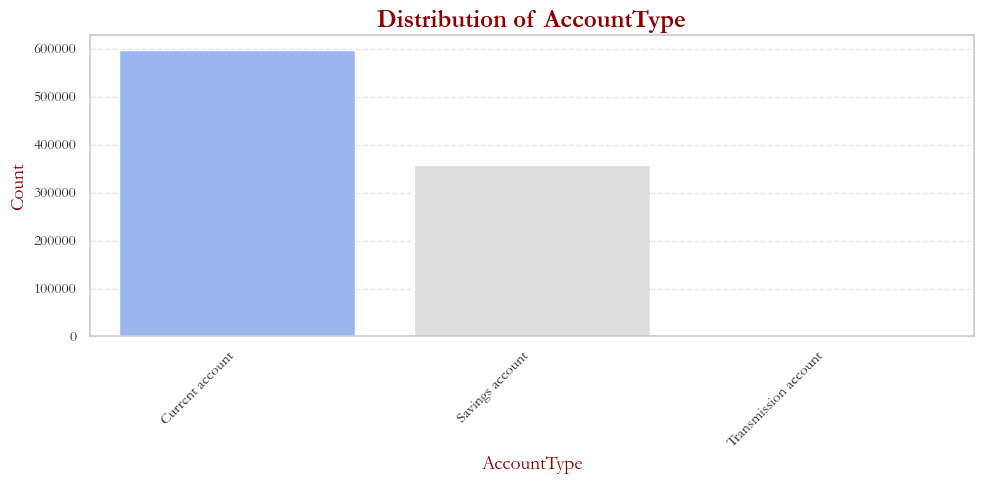

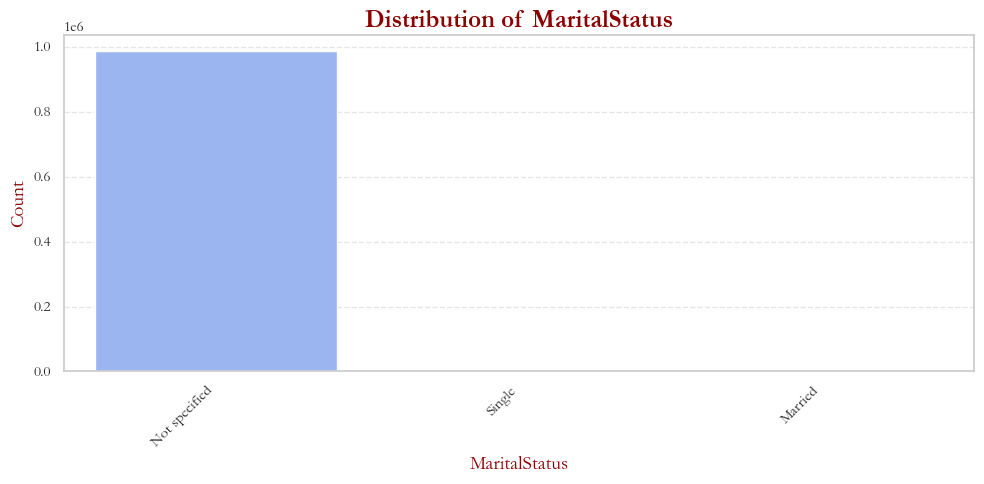

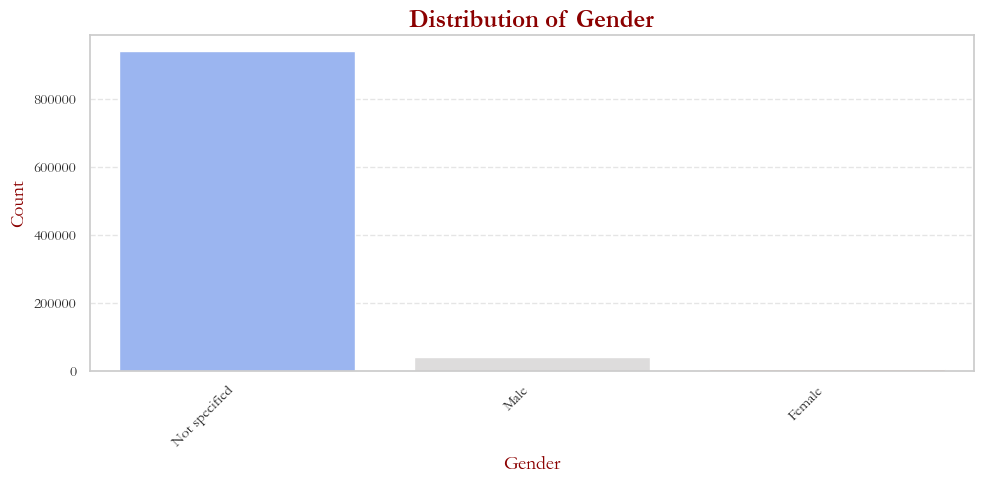

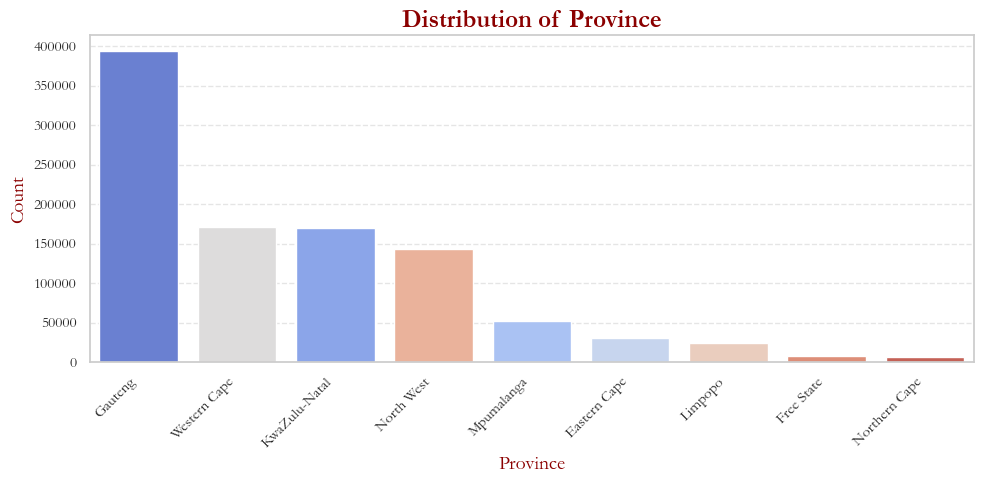

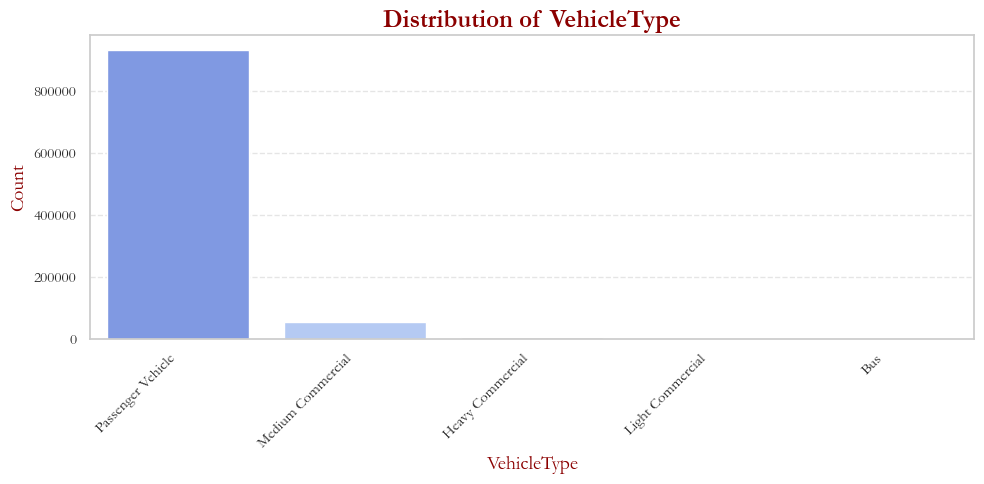

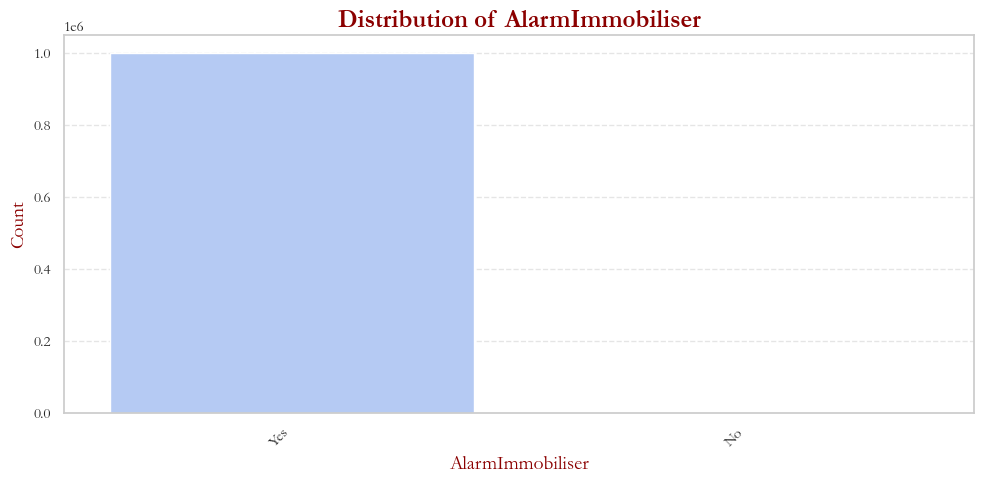

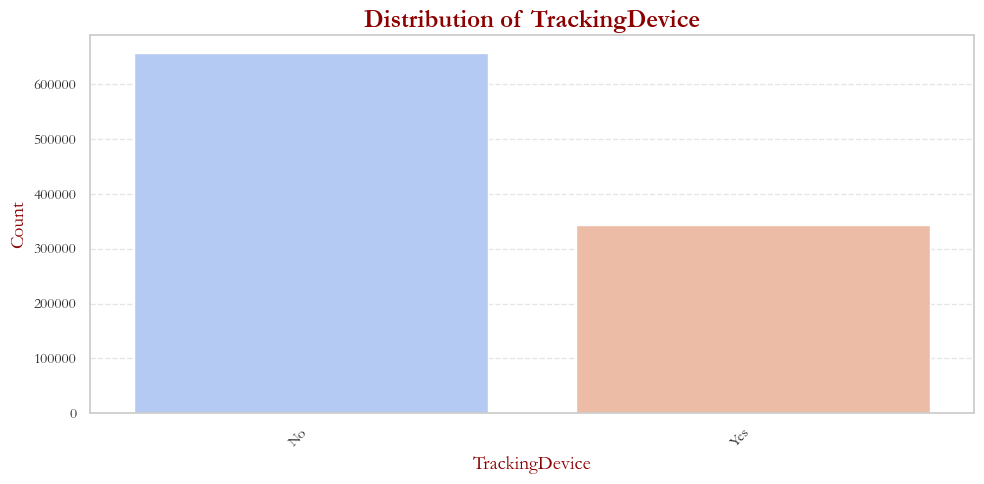

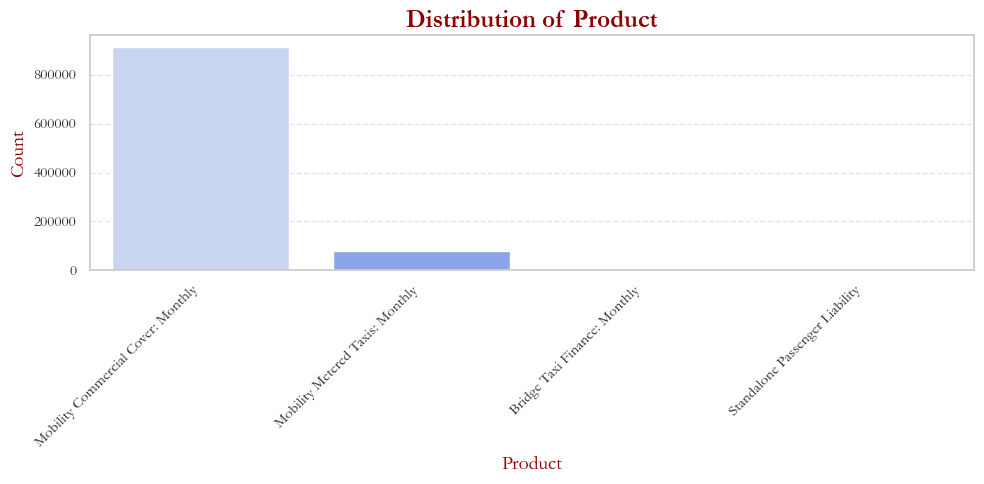

In [27]:
# Create an instance of the DataVisualizer class
visualizer = DataVisualizer(df)

# Define lists for numerical and categorical columns
numerical_columns = [
    'SumInsured',
    'CalculatedPremiumPerTerm',
    'TotalPremium',
    'TotalClaims'
]

categorical_columns = [
    'LegalType',
    'Bank',
    'AccountType',
    'MaritalStatus',
    'Gender',
    'Province',
    'VehicleType',
    'AlarmImmobiliser',
    'TrackingDevice',
    'Product'
]

# Perform univariate analysis on both numerical and categorical columns
visualizer.univariate_analysis(numerical_columns, categorical_columns)

# Insights from Univariate Analysis

## Numerical Variables

### Sum Insured
The distribution is right-skewed, with most policies having lower sums insured and a few with very high amounts. This indicates a diverse range of policy values, with clusters around specific sums suggesting potential policy tiers.

### Calculated Premium Per Term
This variable is also right-skewed, with a peak around a specific amount and variability in premiums. The presence of significantly higher premiums reflects pricing differences among policies.

### Total Premium
The distribution is right-skewed, with most policies showing lower total premiums and a peak around zero. High total premiums may be due to refunds or high-risk factors.

Overall, these distributions reveal a wide range of policy values and premiums, with identifiable clusters and outliers that can aid in risk assessment and pricing strategies.

## Categorical Variables

### Legal Type
Most policies are issued to individuals, indicating a focus on personal insurance. Private companies and close corporations have fewer policies, with public companies, partnerships, and sole proprietorships being even less common.

### Marital Status
A significant portion of the data has "Not specified" for marital status, suggesting incomplete information. Single and married individuals are less represented, highlighting potential issues with data collection or privacy concerns.

### Province
Gauteng has the highest number of policies, with Western Cape and KwaZulu-Natal showing moderate numbers. Other provinces have fewer policies, indicating a concentration of market presence in specific regions.

### Vehicle Type
Passenger vehicles dominate, with fewer policies for commercial vehicle types (medium, heavy, light, and bus). This underscores the company's focus on passenger vehicles.

### Gender
A substantial portion of the data has "Not specified" for gender, indicating missing information. Male and female categories are present but less common, suggesting potential gaps in data collection or reporting.

# Bivariate Analysis